# Paket Prabayar Manakah yang Lebih Baik?

Anda bekerja sebagai seorang analis di perusahaan operator telekomunikasi bernama Megaline. Perusahaan tersebut menawarkan kliennya dua jenis paket prabayar, yaitu paket Surf dan paket Ultimate. Departemen periklanan ingin mengetahui paket prabayar mana yang menghasilkan lebih banyak pendapatan, sehingga mereka bisa membuat anggaran iklan yang sesuai.

Anda akan melakukan analisis awal untuk paket-paket prabayar tersebut berdasarkan sampel klien yang berukuran relatif kecil. Anda memiliki 500 data klien Megaline, yang berisi informasi seperti: siapa mereka, dari mana asalnya, jenis paket apa yang mereka gunakan, serta jumlah panggilan dan pesan yang mereka kirim di tahun 2018. Tugas Anda adalah untuk menganalisis perilaku para pengguna, lalu menentukan paket prabayar manakah yang lebih menguntungkan.

Proyek ini bertujuan untuk mengetahui paket prabayar manakah dari paket data surt dan ultimate yang menghasilkan lebih banyak pendapatan terhadap perusahaan untuk membuat anggaran iklan yang dapat menguntungkan perusahaan. proses penganalisisan meliputi input library, memuat data, memperbaiki dan memperkaya kualitas data, mempelajari perilaku pengguna pada setiap paket data, membuat dan menguji hipotesis lalu kesimpulan.

## Inisialisasi

In [4]:
# Muat semua library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats as st
import seaborn as sns

## Memuat Data

In [5]:
# Muat file data ke dalam DataFrame yang berbeda
df_calls = pd.read_csv('/datasets/megaline_calls.csv')

In [6]:
df_internet= pd.read_csv('/datasets/megaline_internet.csv')

In [7]:
df_messages= pd.read_csv('/datasets/megaline_messages.csv')

In [8]:
df_plans = pd.read_csv('/datasets/megaline_plans.csv')

In [9]:
df_users = pd.read_csv('/datasets/megaline_users.csv')


## Mempersiapkan Data

In [10]:
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [11]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [12]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [13]:
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [14]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


## Paket Prabayar

In [15]:
# Tampilkan informasi/rangkuman umum tentang DataFrame paket-paket prabayar
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [16]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [17]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [18]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [19]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [20]:
# Tampilkan sampel data untuk paket-paket tersebut
df_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [21]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [22]:
df_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [23]:
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [24]:
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Memperbaiki dan Memperkaya kualitas data nanti akan dilakukan pada setiap jenis penggunaan paket data.

## Pengguna

In [25]:
# Tampilkan informasi/rangkuman umum tentang DataFrame pengguna
df_users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [26]:
# Tampilkan sampel data pengguna
df_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


Dari data pengguna, kolom reg_date dan churn_date tipenya yaitu object, kedua kolom tersebut perlu diperbaiki menjadi Datetime. Dan terdapat banyak nilai yang hilang pada kolom churn_date. Disini saya membuat kolom baru dengan tipe boolean yaitu True or False, jika kolom churn_date berisi NaN maka akan diisi False pada kolom baru tersebut yang artinya pengguna masih berlangganan.

### Memperbaiki Data

[Perbaiki masalah data yang eksplisit berdasarkan pengamatan awal.]

In [27]:
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'])
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'])
df_users.dtypes

user_id                int64
first_name            object
last_name             object
age                    int64
city                  object
reg_date      datetime64[ns]
plan                  object
churn_date    datetime64[ns]
dtype: object

### Memperkaya Kualitas Data

Membuat kolom baru, yaitu kolom is_churn, jika user atau pengguna sudah tidak berlangganan maka dituliskan True, sebaliknya masih berlangganan maka kolom berisi False

In [28]:
df_users['is_churn'] = df_users.apply(lambda x : not pd.isna(x.churn_date), axis=1)
df_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_churn
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT,False
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT,False
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT,False
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT,False
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT,False


In [29]:
df_users.duplicated().sum()

0

## Panggilan

In [30]:
# Tampilkan informasi/rangkuman umum tentang DataFrame panggilan
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [31]:
# Tampilkan sampel data berisi panggilan
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Kolom call_date pada data Panggilan masih tipe object, maka perllu diganti menjadi Datetime. kolom duration perlu dilakukan pembulatan ke atas agar lebih mudah dalam proses pengerjaan selanjutnya.

### Memperbaiki Data

In [32]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'])
df_calls['call_date'].dtypes

dtype('<M8[ns]')

### Memperkaya Kualitas Data

In [33]:
df_calls['month'] = df_calls['call_date'].dt.month
df_calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [34]:
df_calls['duration_rounded'] = np.ceil(df_calls['duration'])
df_calls.head()

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


## Pesan/SMS

In [35]:
# Tampilkan informasi/rangkuman umum tentang DataFrame SMS
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [36]:
# Tampilkan sampel data untuk SMS
df_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


kolom message_date masih berbentuk tipe object, pelu diubah tipenya menjadi Datetime.

### Memperbaiki Data

In [37]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'])
df_messages.dtypes

id                      object
user_id                  int64
message_date    datetime64[ns]
dtype: object

### Memperkaya Kualitas Data

In [38]:
df_messages['month'] = df_messages['message_date'].dt.month
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [39]:
# Tampilkan informasi/rangkuman umum tentang DataFrame internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [40]:
# Tampilkan sampel data untuk traffic internet
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


kolom session_date perlu diperbaiki menjadi tipe Datetime. perlu penambahan kolom dengan penggunaan internet dengan kapasitas gigabite, untuk mempermudah pengerjaan kedepannya, karena dilihat dari deskripsi proyek paket langganan untuk internet di deskripsikan dalam bentuk gigabite.

### Memperbaiki Data

In [41]:
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'])
df_internet.dtypes

id                      object
user_id                  int64
session_date    datetime64[ns]
mb_used                float64
dtype: object

In [42]:
df_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


### Memperkaya Kualitas Data

In [43]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


## Mempelajari Syarat dan Kondisi Terkait Paket Prabayar

In [44]:
# Tampilkan persyaratan paket prabayar dan pastikan Anda memahaminya
df_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Mengagregasi Data per Pengguna


In [45]:
df_calls.head()

,id,user_id,call_date,duration,month,duration_rounded
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0


In [46]:
# Hitung jumlah menit yang dihabiskan oleh setiap pengguna untuk melakukan panggilan per bulan. Simpan hasilnya.
call_monthly = df_calls.pivot_table(index = ['user_id', 'month'], values='duration_rounded', aggfunc='sum')
call_monthly = call_monthly.reset_index()
call_monthly.head()

,user_id,month,duration_rounded
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0


In [47]:
# Hitung jumlah SMS yang dikirim oleh setiap pengguna per bulan. Simpan hasilnya.
df_messages.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


In [48]:
messages_per_month = df_messages.pivot_table(index= ['user_id', 'month'], values='id', aggfunc='count')
messages_per_month = messages_per_month.reset_index()
messages_per_month = messages_per_month.rename(columns = {"id": "messages_per_month"})
messages_per_month

,user_id,month,messages_per_month
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [49]:
# Hitung volume traffic internet yang digunakan oleh setiap pengguna per bulan. Simpan hasilnya.
internet_monthly = df_internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')
internet_monthly = internet_monthly.reset_index()
internet_monthly['gb_used'] = np.ceil(internet_monthly['mb_used']/1024)
internet_monthly

,user_id,month,mb_used,gb_used
0,1000,12,1901.47,2.0
1,1001,8,6919.15,7.0
2,1001,9,13314.82,14.0
3,1001,10,22330.49,22.0
4,1001,11,18504.30,19.0
...,...,...,...,...
2272,1498,12,23137.69,23.0
2273,1499,9,12984.76,13.0
2274,1499,10,19492.43,20.0
2275,1499,11,16813.83,17.0


In [50]:
#filer user_id, city, dan plan.
df_users_filter = df_users[['user_id', 'city', 'plan']]
df_user_plan = df_users_filter.merge(df_plans, left_on = 'plan', right_on = 'plan_name')
df_user_plan

,user_id,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1006,"San Francisco-Oakland-Berkeley, CA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
2,1008,"Orlando-Kissimmee-Sanford, FL MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
3,1011,"Cleveland-Elyria, OH MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
4,1013,"Knoxville, TN MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
...,...,...,...,...,...,...,...,...,...,...,...
495,1494,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
496,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
497,1496,"New Orleans-Metairie, LA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [51]:
df_monthly_data = call_monthly.merge(messages_per_month, how='outer', on=['user_id', 'month'])\
                                .merge(internet_monthly, how='outer', on=['user_id', 'month'])\
                                .merge(df_user_plan, on='user_id')
df_monthly_data.head()

,user_id,month,duration_rounded,messages_per_month,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [52]:
# Tambahkan informasi paket prabayarnya
df_monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2293 entries, 0 to 2292
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2293 non-null   int64  
 1   month                  2293 non-null   int64  
 2   duration_rounded       2258 non-null   float64
 3   messages_per_month     1806 non-null   float64
 4   mb_used                2277 non-null   float64
 5   gb_used                2277 non-null   float64
 6   city                   2293 non-null   object 
 7   plan                   2293 non-null   object 
 8   messages_included      2293 non-null   int64  
 9   mb_per_month_included  2293 non-null   int64  
 10  minutes_included       2293 non-null   int64  
 11  usd_monthly_pay        2293 non-null   int64  
 12  usd_per_gb             2293 non-null   int64  
 13  usd_per_message        2293 non-null   float64
 14  usd_per_minute         2293 non-null   float64
 15  plan

In [53]:
df_monthly_data.isna().sum()

user_id                    0
month                      0
duration_rounded          35
messages_per_month       487
mb_used                   16
gb_used                   16
city                       0
plan                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
usd_monthly_pay            0
usd_per_gb                 0
usd_per_message            0
usd_per_minute             0
plan_name                  0
dtype: int64

Terdapat bayak nilai yang hilang pada messages_per_month, hal ini mungkin dikarenakan pengguna ada yang sama sekali tidak melakukan pengiriman pesan, begitu pula sama halnya dengan nilai yang hilang pada duration_rounded, mb_used dan gb_used. oleh karena itu kita akan mengisi NaN dengan nilai 0, karena kita asumsikan pengguna tidak melakukan layanan tersebut.

In [54]:
df_monthly_data[df_monthly_data['messages_per_month'].isna()]

,user_id,month,duration_rounded,messages_per_month,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
29,1009,5,534.0,NaN,20389.40,20.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
30,1009,6,823.0,NaN,18845.90,19.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
31,1009,7,880.0,NaN,30421.65,30.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
32,1009,8,731.0,NaN,24557.52,24.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
33,1009,9,776.0,NaN,20962.40,21.0,"San Jose-Sunnyvale-Santa Clara, CA MSA",surf,50,15360,500,20,10,0.03,0.03,surf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2259,1499,9,346.0,NaN,12984.76,13.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2260,1499,10,385.0,NaN,19492.43,20.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2261,1499,11,308.0,NaN,16813.83,17.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf
2262,1499,12,496.0,NaN,22059.21,22.0,"Orlando-Kissimmee-Sanford, FL MSA",surf,50,15360,500,20,10,0.03,0.03,surf


In [55]:
for column in ['duration_rounded', 'messages_per_month', 'mb_used', 'gb_used']:
    df_monthly_data[column] = df_monthly_data[column].fillna(0)

In [56]:
df_monthly_data.isna().sum()

user_id                  0
month                    0
duration_rounded         0
messages_per_month       0
mb_used                  0
gb_used                  0
city                     0
plan                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

In [57]:
# Hitung pendapatan bulanan untuk setiap pengguna
df_monthly_data['gb_month_included'] = df_monthly_data['mb_per_month_included'] / 1024
df_monthly_data.head()

,user_id,month,duration_rounded,messages_per_month,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0


In [58]:
def hitung_profit (row):
    call_charged = row['duration_rounded'] - row['minutes_included']
    msg_charged = row['messages_per_month'] - row['messages_included']
    internet_charged = row['gb_used'] - row['gb_month_included']
    profit_charged = 0
    
    if call_charged > 0:
        profit_charged += call_charged * row['usd_per_minute']
    if msg_charged > 0:
        profit_charged += msg_charged * row['usd_per_message']
    if internet_charged > 0:
        profit_charged += internet_charged * row['usd_per_gb']
        
    return profit_charged + row['usd_monthly_pay']

In [59]:
df_monthly_data['profit'] = df_monthly_data.apply(hitung_profit, axis=1)
df_monthly_data.head(10)

,user_id,month,duration_rounded,messages_per_month,mb_used,gb_used,city,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,gb_month_included,profit
0,1000,12,124.0,11.0,1901.47,2.0,"Atlanta-Sandy Springs-Roswell, GA MSA",ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,30.0,70.00
1,1001,8,182.0,30.0,6919.15,7.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
2,1001,9,315.0,44.0,13314.82,14.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
3,1001,10,393.0,53.0,22330.49,22.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,90.09
4,1001,11,426.0,36.0,18504.30,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
5,1001,12,412.0,44.0,19369.18,19.0,"Seattle-Tacoma-Bellevue, WA MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
6,1002,10,59.0,15.0,6552.01,7.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
7,1002,11,386.0,32.0,19345.08,19.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,60.00
8,1002,12,384.0,41.0,14396.24,15.0,"Las Vegas-Henderson-Paradise, NV MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,20.00
9,1003,12,1104.0,50.0,27044.14,27.0,"Tulsa, OK MSA",surf,50,15360,500,20,10,0.03,0.03,surf,15.0,158.12


## Mempelajari Perilaku Pengguna

[Hitung beberapa perhitungan statistika deskriptif yang berguna untuk data yang telah diagregasi dan digabungkan. Hal ini biasanya mampu mengungkapkan gambaran keseluruhan yang ditangkap oleh data tersebut. Buatlah beberapa grafik yang berguna untuk membantu pemahaman Anda. Mengingat bahwa tugas utamanya adalah membandingkan paket-paket prabayar dan memutuskan paket prabayar manakah yang lebih menguntungkan, maka perhitungan statistika dan grafik harus dilakukan berdasarkan tiap paket.]

[Tersedia petunjuk yang relevan pada bagian komentar terkait Panggilan. Akan tetapi, komentar serupa tidak tersedia untuk SMS dan Internet. Namun demikian, jangan khawatir, prinsip dasar statistik untuk SMS dan Internet sama saja dengan Panggilan.]

### Panggilan

In [60]:
# Bandingkan durasi rata-rata panggilan setiap paket per bulannya. Buatlah sebuah diagram batang untuk memvisualisasikannya.
mean_plan_name = df_monthly_data.groupby('plan_name')['duration_rounded'].agg('mean')
mean_plan_name

plan_name
surf        428.749523
ultimate    430.450000
Name: duration_rounded, dtype: float64

<AxesSubplot:xlabel='plan_name'>

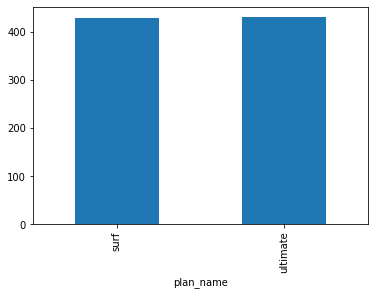

In [61]:
mean_plan_name.plot(kind='bar')

rata-rata panggilan dari setiap paket data tenyata tidak jauh berbeda.

In [62]:
df_surf = df_monthly_data[df_monthly_data['plan_name'] == 'surf']
df_ultimate = df_monthly_data[df_monthly_data['plan_name'] == 'ultimate']

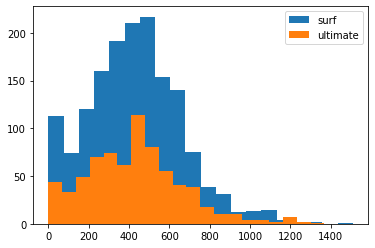

In [63]:
# Bandingkan jumlah menit yang dibutuhkan pengguna tiap paket per bulannya. Buatlah sebuah histogram.
plt.hist(df_surf['duration_rounded'], bins=20, label='surf')
plt.hist(df_ultimate['duration_rounded'], bins=20, label='ultimate')
plt.legend()
plt.show()

pola pengguna paket data surf dan ultimate penggunaannya hampir sama atau mirip, paling banyak durasinya rata-rata dari kedua jenis paket yaitu pada sekitar 400-500 menit, dan pesebaran nilai lebarnya hampir mirip. karena pola penggunaan paketnya sama mungkin kuota gratis untuk surf dapat dikurangi dengan harapan bisa lebih banyak pengguna beralih dan menggunakan paket yang platinum, karena harga paket platinum lebih mahal sehingga jika banyak yang berlangganan pada paket platinum dapat meningkatkan profit bagi perusahaan.

In [64]:
# Hitung rata-rata dan varians dari durasi panggilan bulanan
agg_call = df_monthly_data.groupby('plan_name')['duration_rounded'].agg(['mean', 'var'])
agg_call

,mean,var
plan_name,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


<AxesSubplot:xlabel='duration_rounded', ylabel='plan_name'>

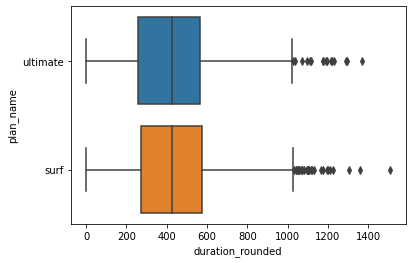

In [65]:
sns.boxplot(data=df_monthly_data, x='duration_rounded', y='plan_name')

kedua paket data kecenderungannya hampir sama, mediannya hampir sama dan terdapat cukup banyak outlier.

### Pesan/SMS

In [66]:
# Bandingkan jumlah SMS yang cenderung dikirim pengguna tiap paket per bulannya
total_msg = df_monthly_data.groupby('plan_name')['messages_per_month'].agg('sum')

In [67]:
total_msg

plan_name
surf        49014.0
ultimate    27037.0
Name: messages_per_month, dtype: float64

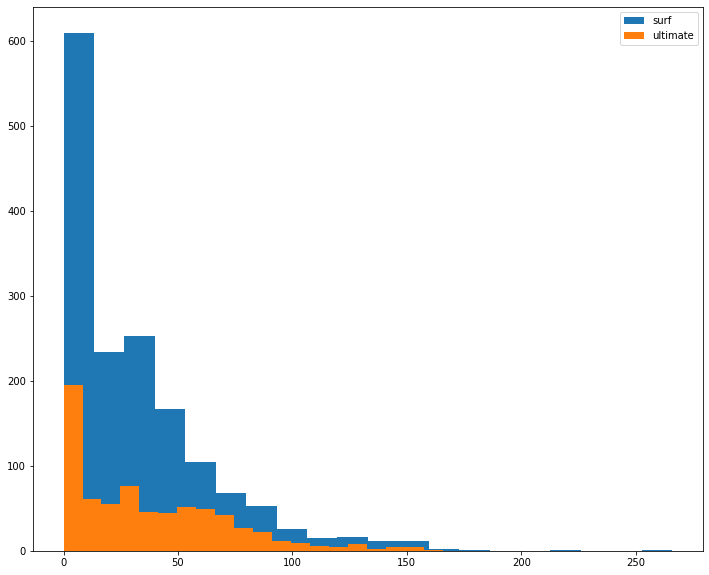

In [68]:
plt.figure(figsize=(12, 10))
plt.hist(df_surf['messages_per_month'], bins=20, label='surf')
plt.hist(df_ultimate['messages_per_month'], bins=20, label='ultimate')
plt.legend()
plt.show()

perilaku pengguna dari setiap paket untuk penggunanaan pesan kecenderungan polanya hampir sama yaitu rata-rata 0-10 pesan perbulannya.

### Internet

In [69]:
df_plan_surf = df_monthly_data[df_monthly_data['plan_name'] == 'surf']
len(df_plan_surf)

1573

In [70]:
df_plan_ultimate = df_monthly_data[df_monthly_data['plan_name'] == 'ultimate']
len(df_plan_ultimate)

720

In [71]:
# Bandingkan jumlah traffic internet yang dihabiskan oleh pengguna per paket
total_gb = df_monthly_data.groupby('plan_name')['gb_used'].agg('sum')
total_gb

plan_name
surf        26223.0
ultimate    12461.0
Name: gb_used, dtype: float64

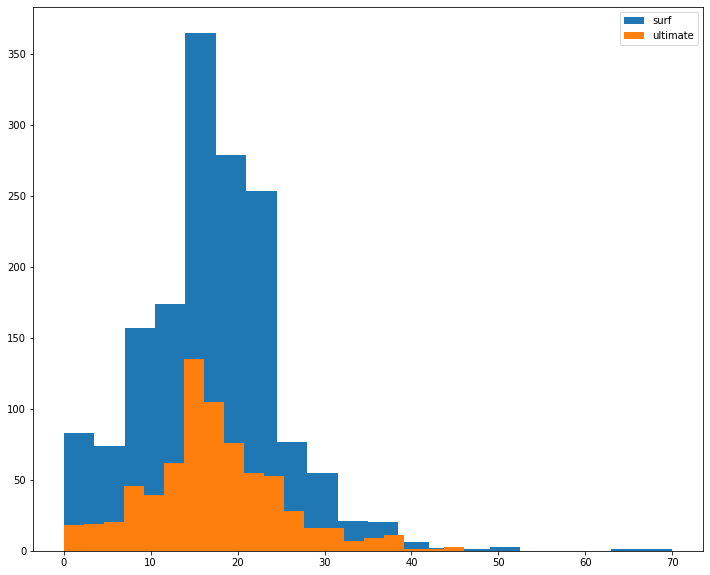

In [72]:
plt.figure(figsize=(12, 10))
plt.hist(df_surf['gb_used'], bins=20, label='surf')
plt.hist(df_ultimate['gb_used'], bins=20, label='ultimate')
plt.legend()
plt.show()

Jika dilihat dari jumlah traffic internet yang dihabiskan oleh pengguna per paket, perbedaan jumlahnya cukup jauh hal ini karena pengguna paket surf lebih banyak dari pada paket platinum. tetapi jika dilihat dari polanya pada histogtam, paket surf dan ultimate mempunyai kecenderungan pola median dan persebaran yang sama. yang artinya perilaku pengguna terhadap paket surf dan ultimate sama.

## Pendapatan

In [73]:
df_surf['profit'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: profit, dtype: float64

In [74]:
df_ultimate['profit'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: profit, dtype: float64

In [75]:
mean_profit = df_monthly_data.groupby('plan_name')['profit'].agg('mean')
mean_profit

plan_name
surf        60.706408
ultimate    72.313889
Name: profit, dtype: float64

<AxesSubplot:xlabel='plan_name'>

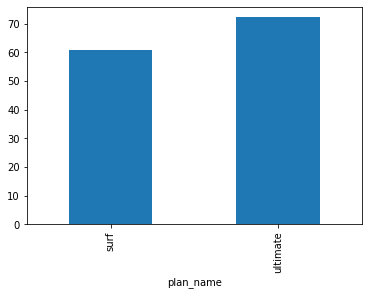

In [76]:
mean_profit.plot(kind='bar')

pendapatan pengguna pada paket suft rata-rata pendapatannya yaitu 98, sedangkan paket ultimate lebih rendah rata-rata pendapatannya yaitu 70. hal ini karena pengguna paket surf banyak yang melebihi kuota gratis. 

## Menguji Hipotesis Statistik

### Uji hipotesis profit surf dan ultimate

H0 : RATA-RATA PROFIT SURF DAN ULTIMATE SAMA

H1 : RATA-RATA PROFIT SURF DAN ULTIMATE BERBEDA

In [77]:
profit_data = df_monthly_data.groupby('plan_name')['profit'].agg(['mean', 'var'])
profit_data

,mean,var
plan_name,,
surf,60.706408,3067.835152
ultimate,72.313889,129.848486


In [78]:
sample_1 = df_surf['profit']
sample_2 = df_ultimate['profit']

In [79]:
st.levene(sample_1, sample_2)

LeveneResult(statistic=404.7301727752691, pvalue=5.028876110654919e-83)

nilai varian jauh berbeda dan pvalue kurang dari alpha maka equal_var = False

In [80]:
alpha = 0.05
results = st.ttest_ind(sample_1,
                     sample_2,
                     equal_var=False)

In [81]:
results.pvalue

3.17039054811355e-15

In [82]:
# Uji hipotesisnya
if (results.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


hasil menunjukan tolak null hypotesis, yang artinya rata-rata profit paket data surf dan ultimate berbeda

### Uji hipotesis pendapatan rata-rata dari pengguna di wilayah NY-NJ

H0 : RATA-RATA PROFIT PENGGUNA WILAYAH NY-NJ SAMA DENGAN WILAYAH LAIN

H1 : RATA-RATA PROFIT PENGGUNA WILAYAH NY-NJ BERBEDA DENGAN WILAYAH LAIN

In [83]:
sample_3 = df_monthly_data.loc[df_monthly_data['city'] == 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'profit']
sample_4 = df_monthly_data.loc[df_monthly_data['city'] != 'New York-Newark-Jersey City, NY-NJ-PA MSA', 'profit']

In [84]:
sample_3.mean()

59.921352785145885

In [85]:
sample_4.mean()

65.2227713987474

In [86]:
st.levene(sample_3, sample_4)

LeveneResult(statistic=2.345281651730069, pvalue=0.12580091109612837)

karena pvalue lebih dari alpha maka equal_var = True

In [87]:
alpha = 0.05
result = st.ttest_ind(sample_3,
                     sample_4,
                     equal_var=True)

In [88]:
result.pvalue

0.043557431621342436

In [89]:
# Uji hipotesisnya
if (result.pvalue < alpha):
    print("Tolak null hypothesis")
else:
    print("Kita gagal menolak null hypothesis")

Tolak null hypothesis


hasil menunjukan Kita gagal menolah null hypotesis, yang artinya rata-rata profit wilayah NY-NJ sama dengan wilayah lain

## Kesimpulan Umum

Pada proses penganalisisan data diawali dengan mengimport library dan memuat data dengan. kemudian mengeksplorasi data awal untuk melihat apakah ada data yang aneh atau data yang hilang, setelah dilihat informasi dari tiap data tersebut terdapat NaN dan tipe data yang tidak sesuai. Pertama-tama mengubah tipe data yang tidak sesuai pada tiap tabel seperti mengubah tipe data menjadi Datetime.Kemudian terdapat nilai yang hilang pada dataframe users dikolom churn_date yaitu kolom berisi tanggal pengguna berhenti menggunakan layanan (jika nilainya hilang atau tidak ada, berarti paket layanan sedang digunakan saat data ini dibuat). unutk mengatasi hal ini saya memilih untuk membuat kolom baru dengan tipe boolean. 

Berdasarkan hasil dari Pengujian hipotesis terhadap jenis paket surf dan ultimate menunjukan bahwa rata-rata profit pada kedua paket berbeda, jika dilihat dari harga paket surf hanya 20 dolar dan paket ultimate 70 dolar sedangkan rata-rata pemakaian pengguna pada kedua paket sama, alangkah lebih baiknya perusahaan perlu mempertimbangkan kelanjutan untuk paket surf agar pengguna dapat tertarik dengan paket ultimate yang biayanya lebih besar sehingga meningkatkan pendapatan perusahaan dan dapat membuat anggaran iklan yang dapat menguntungkan perusahaan.

untuk hasil uji hipotesis profit pada wilayah NY-NJ, hasil menunjukan Kita gagal menolak null hypotesis, yang artinya rata-rata profit wilayah NY-NJ sama dengan wilayah lain

Pengguna paket surf lebih banyak dari pada pengguna paket ultimate. hal ini karena biaya langanan paket ultimate lebih mahal dari pada paket surf. padahal jika dilihat dari data, pengguna paket surf selalu melebihi dari batas paket gratis. sehingga banyak pengguna yang menggunakan paket surf. Oleh karena itu mungkin Departemen periklanan dapat mempertimbangkan agar kuota gratis untuk surf dapat dikurangi dengan harapan bisa lebih banyak pengguna beralih dan menggunakan paket yang platinum, karena harga paket platinum lebih mahal sehingga jika banyak yang berlangganan pada paket platinum dapat meningkatkan profit bagi perusahaan.